## **Hypothesis Testing**

In [298]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **Binomial Test**

    A test where the outcome is binary and depends on some probability e.g. toss of a coin. 
    
    Can be used to develop a distribution of outcomes following multiple binomial test i.e. a binomial distribution.

##### **Simulate Multiple Coin Flips**

In [267]:
# Simulate 10 flips of a coin.
flips = np.random.choice(['heads', 'tails'], size=10, p=[0.5, 0.5])
num_heads = np.sum(flips == 'heads')
print(num_heads)

3


In [280]:
# Simulate the distribution of heads obtained in flips of 10 coins 10,000 times, 
# and plot the distribution of heads.
heads_dist10 = []

for num in range(10000):
    flips = np.random.choice(['heads', 'tails'], size=10, p=[0.5, 0.5])
    num_heads = np.sum(flips == 'heads')
    heads_dist10.append(num_heads)


heads_dist10_min = np.min(heads_dist10)
heads_dist10_max = np.max(heads_dist10)

print(heads_dist10_min, heads_dist10_max)

0 10


In [281]:
np.std(heads_dist10)

1.5819292019556375

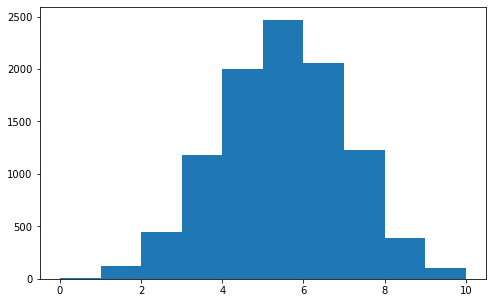

In [282]:
plt.figure(figsize=(8, 5));
plt.hist(heads_dist10, bins=10);
plt.show();

##### **Changing Size**

In [283]:
# Simulate the distribution of heads obtained in flips of 500 coins 10,000 times, 
# and plot the distribution of heads.
heads_dist500 = []

for num in range(10000):
    flips = np.random.choice(['heads', 'tails'], size=500, p=[0.5, 0.5])
    num_heads = np.sum(flips == 'heads')
    heads_dist500.append(num_heads)


heads_dist500_min = np.min(heads_dist500)
heads_dist500_max = np.max(heads_dist500)

print(heads_dist500_min, heads_dist500_max)

213 299


In [284]:
np.std(heads_dist500)

11.215412152480177

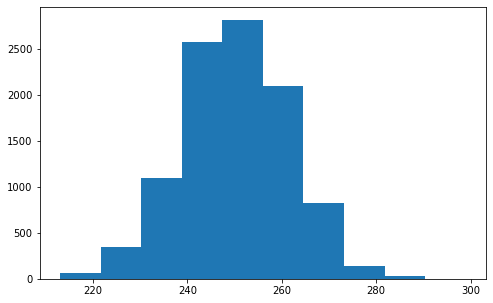

In [285]:
plt.figure(figsize=(8, 5));
plt.hist(heads_dist500, bins=10);
plt.show();

In [286]:
# Simulate the distribution of heads obtained in flips of 1000 coins 10,000 times, 
# and plot the distribution of heads.
heads_dist1000 = []

for num in range(10000):
    flips = np.random.choice(['heads', 'tails'], size=1000, p=[0.5, 0.5])
    num_heads = np.sum(flips == 'heads')
    heads_dist1000.append(num_heads)


heads_dist1000_min = np.min(heads_dist1000)
heads_dist1000_max = np.max(heads_dist1000)

print(heads_dist1000_min, heads_dist1000_max)

432 552


In [287]:
np.std(heads_dist1000)

15.75579106106704

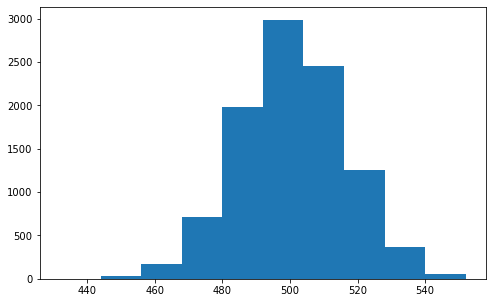

In [288]:
plt.figure(figsize=(8, 5));
plt.hist(heads_dist1000, bins=10);
plt.show();

In [289]:
# Simulate the distribution of heads obtained in flips of 10,000 coins 10,000 times, 
# and plot the distribution of heads.
heads_dist10000 = []

for num in range(10000):
    flips = np.random.choice(['heads', 'tails'], size=10000, p=[0.5, 0.5])
    num_heads = np.sum(flips == 'heads')
    heads_dist10000.append(num_heads)


heads_dist10000_min = np.min(heads_dist10000)
heads_dist10000_max = np.max(heads_dist10000)

print(heads_dist10000_min, heads_dist10000_max)

4823 5198


In [290]:
np.std(heads_dist10000)

50.24076373782548

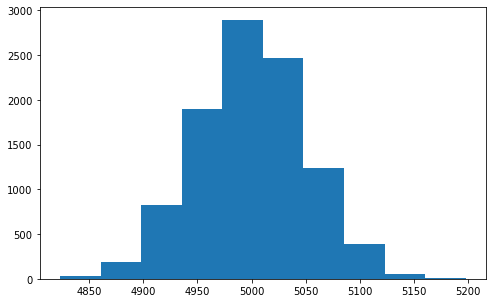

In [294]:
plt.figure(figsize=(8, 5));
plt.hist(heads_dist10000, bins=10);
plt.show();

    Increasing the size results in greater standard deviation.

##### **Develop a Binomial Test Function**

In [295]:
def simulation_binomial_test(observed_successes, n, prob):

  # n = sample size, prob = probability of success  

  null_outcomes = []
  
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[prob, 1-prob])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  
  null_outcomes = np.array(null_outcomes)
  p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
  
  #return the p-value
  return p_value

    # calculate 2-sided p_value using scipy.
    pval = stats.binom_test(observed_successes, n, prob)

    # calculate 1-sided p_value using scipy.
    pval = stats.binom_test(observed_successes, n, prob, alternative='less')

#### **1-Sample t-test**

In [2]:
sample = pd.Series([1.3, 0.47, 1.5, 1.66, 2.43, 1.29, 0.94, 1.06, 1.03, 0.76, 0.6, 0.76, 0.32, 2.2, 1.24, 1.8, 1.66, 0.51, 
                    0.72, 1.62, 0.7, 0.76, 0.9, 0.93, 0.98, 0.42, 0.59, 0.12, 0.95, 0.55, 0.16, 1.25, 0.42, 0.64, 0.66, 
                    1.04, 0.49,0.41, 0.4, 0.81, 0.71, 0.04, 0.6, 2.44, 1.61, 0.13, 2.08, 0.7, 0.61, 0.58, 0.77, 0.67, 1.16, 
                    0.31, 0.3, 0.66, 0.03, 0.54, 0.63, 1.03, 0.73, 2.02])
sample

0     1.30
1     0.47
2     1.50
3     1.66
4     2.43
      ... 
57    0.54
58    0.63
59    1.03
60    0.73
61    2.02
Length: 62, dtype: float64

    1. The null hypothesis: sample is drawn from population with mean equal to one.

    2. The alternative hypothesis: sample is drawn from a population with mean not equal to one.

    3. The significance level is 95%.

In [3]:
len(sample)

62

In [4]:
sample_mean = sample.mean()
sample_mean

0.8935483870967743

In [5]:
sample_stddev = np.std(sample)
sample_stddev

0.5698474520662796

In [8]:
std_error = sample_stddev/np.sqrt(len(sample))
std_error

0.07237069878315248

In [7]:
std_error = stats.sem(sample)
std_error

0.07296148980027695

##### **Using the Manual Method**

    Steps:
    
    1. Determine the null distribution via central limit theorem.
    
    2. Calculate the confidence interval.
    
    3. Test the null hypothesis i.e. obtain the pval.

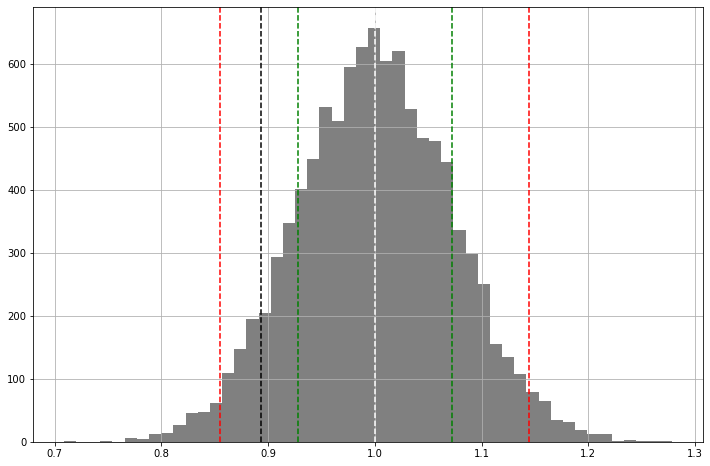

In [151]:
# Determine the null distribution via central limit theorem.

sample_mean_dist = np.random.normal(loc=1,               # population mean
                                    scale=std_error,     # estimated standard error
                                    size=10000
                                    )

sample_mean_dist = pd.Series(sample_mean_dist)

# plot distribution.
sample_mean_dist.hist(bins=50, grid=True, color='gray', figsize=(12, 8));
plt.axvline(1, linestyle="--", color='white');
plt.axvline(sample_mean, linestyle="--", color='black');
plt.axvline(1 + std_error, linestyle="--", color='green');
plt.axvline(1 - std_error, linestyle="--", color='green');
plt.axvline(1 + 2*std_error, linestyle="--", color='red');
plt.axvline(1 - 2*std_error, linestyle="--", color='red');

    from the plot, one may surmise that the sample mean is not significant and therefore the null hypothesis is accepted.

In [44]:
# Calculate the confidence interval
confidence_interval = np.percentile(np.array(sample_mean_dist), [2.5, 97.5])
confidence_interval

array([0.8602308 , 1.14355298])

In [45]:
confidence_interval = [1 - 2*std_error, 1 + 2*std_error]
confidence_interval

[0.855258602433695, 1.144741397566305]

In [46]:
#  Test the null hypothesis i.e. obtain the pval.
pval = len(sample_mean_dist[sample_mean_dist < 0.89])/len(sample_mean_dist)
pval

0.0634

In [47]:
z_score = (0.89 - 1)/std_error
pval = stats.norm.cdf(z_score)
pval

0.06426149972288563

##### **Using the Scipy Method**

In [53]:
tstat, pval = stats.ttest_1samp(sample, 1)
pval = pval/2
pval

0.07484626541081206

In [54]:
sample1 = [172, 155, 144, 112, 79, 132, 126, 184, 145, 155, 65, 73, 
           56, 156, 117, 213, 143, 86, 86, 197, 54, 195, 186, 108, 
           76, 191, 54, 115, 106, 173, 91, 95, 144, 94, 135, 116, 
           182, 144, 127, 216, 71, 200, 182, 71, 129]
sample1

[172,
 155,
 144,
 112,
 79,
 132,
 126,
 184,
 145,
 155,
 65,
 73,
 56,
 156,
 117,
 213,
 143,
 86,
 86,
 197,
 54,
 195,
 186,
 108,
 76,
 191,
 54,
 115,
 106,
 173,
 91,
 95,
 144,
 94,
 135,
 116,
 182,
 144,
 127,
 216,
 71,
 200,
 182,
 71,
 129]

In [56]:
tstat, pval = stats.ttest_1samp(sample1, 100)
pval

9.338735146790408e-05

    sample1 is not from same population as the population with average of 100.

### **2-Sample t-test**

    Investigates relationship between a quantitative variable and a binary categorical variable.
    
    Assumptions:
        
        1. Observations are independent and randomly sampled. # accepted
        
        2. The standard deviations of groups are approx. a ratio between 0.9 and 1.1.  # to be assessed
        
        3. The data are normally distributed.                # to be assessed
        
        4. The categorical groups must be independent.       # accepted

    significance level is 0.05

### **Import Data**

In [59]:
sample2 = pd.read_csv('times_version.txt', engine='python', sep=',')
sample2

,time_minutes,version
0,11.92,new
1,12.90,old
2,13.76,old
3,15.68,old
4,16.28,old
...,...,...
95,34.88,old
96,35.35,new
97,35.37,new
98,36.19,new


In [63]:
sample2_new = sample2[sample2.version == 'new'].reset_index(drop=True)
sample2_new.head()

,time_minutes,version
0,11.92,new
1,16.93,new
2,17.20,new
3,19.52,new
4,19.65,new


In [64]:
sample2_old = sample2[sample2.version == 'old'].reset_index(drop=True)
sample2_old.head()

,time_minutes,version
0,12.90,old
1,13.76,old
2,15.68,old
3,16.28,old
4,16.88,old


In [296]:
# Sample length of two flower population.
sample3_a = [1.53021758, 0.70571215, 2.01610148, 1.14367405, 0.93970563,
             1.74358147, 1.72979421, 0.99173825, 1.30784819, 0.18865752,
             1.92501786, 1.79597301, 1.77666206, 0.54937259, 1.13296132,
             1.40105918, 1.60272671, 1.44154697, 1.9605791 , 0.52757822,
             1.19867684, 0.99201533]

sample3_b = [1.65802641, 1.76603167, 1.89544547, 1.45920841, 1.80266623,
             0.80989183, 1.54506744, 1.85769076, 1.48064793, 1.7310313 ,
             1.91207357, 1.71378148, 1.70911519, 1.56339253, 1.63741389,
             1.50316156, 1.85250241, 2.15778815, 1.62285988, 1.43006622,
             1.61084258, 0.97720672, 1.67433766, 1.03085296]

In [66]:
url = 'https://drive.google.com/file/d/1nYRMCgv3OKaiIUDBPgq-EnE2sWhgrJI3/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
sample4 = pd.read_csv(path)
sample4.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [68]:
sample4_A = sample4[sample4.Page == 'Page A'].reset_index(drop=True)
sample4_A.head()

,Page,Time
0,Page A,21.0
1,Page A,35.0
2,Page A,67.0
3,Page A,211.0
4,Page A,132.0


In [69]:
sample4_B = sample4[sample4.Page == 'Page B'].reset_index(drop=True)
sample4_B.head()

,Page,Time
0,Page B,253.0
1,Page B,71.0
2,Page B,85.0
3,Page B,246.0
4,Page B,149.0


In [73]:
# sample2 groups have approx. equal standard deviation
np.std(sample2_new.time_minutes)/np.std(sample2_old.time_minutes)   

1.0963106120479715

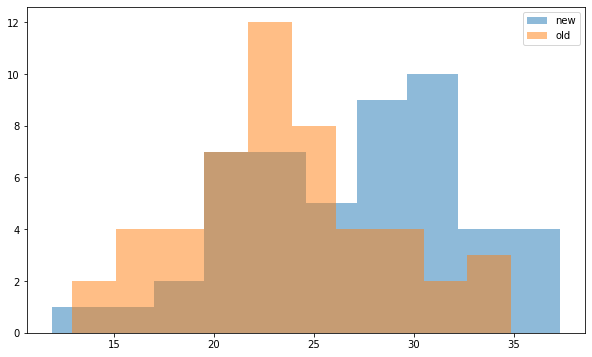

In [81]:
# data is approx. normally distributed for all samples.
plt.figure(figsize=(10, 6))
plt.hist(sample2_new.time_minutes, bins=10, alpha=0.5, label='new')
plt.hist(sample2_old.time_minutes, bins=10, alpha=0.5, label='old')
plt.legend()
plt.show();

In [93]:
# sample3 groups does not have approx. equal standard deviation
np.std(sample3_a)/np.std(sample3_b) 

1.6665588758491474

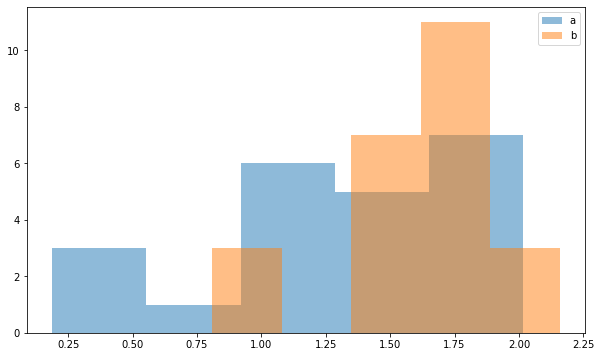

In [92]:
# groups are not approx. normally distributed for all samples.
plt.figure(figsize=(10, 6))
plt.hist(sample3_a, bins=5, alpha=0.5, label='a')
plt.hist(sample3_b, bins=5, alpha=0.5, label='b')
plt.legend()
plt.show();

In [97]:
# sample4 groups does have approx. equal standard deviation
np.std(sample4_A.Time)/np.std(sample4_B.Time) 

0.883572099018151

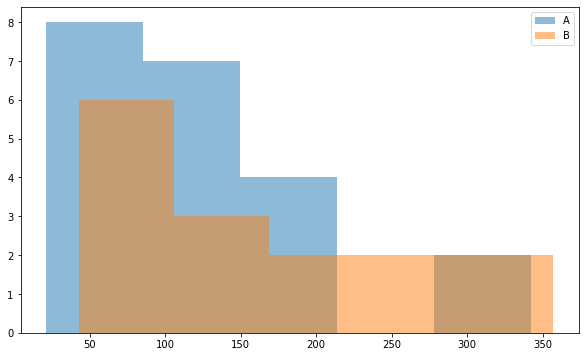

In [98]:
# sample4 groups are not approx. normally distributed for all samples.
plt.figure(figsize=(10, 6))
plt.hist(sample4_A.Time, bins=5, alpha=0.5, label='A')
plt.hist(sample4_B.Time, bins=5, alpha=0.5, label='B')
plt.legend()
plt.show();

##### **Strategy for normally distributed and approx. equal standard deviation**

In [100]:
tstat, pval = stats.ttest_ind(sample2_new.time_minutes, sample2_old.time_minutes)
print(pval)

0.0020408264429903995


    Based on this pval, the pval is significant and therefore the null hypothesis is rejected.

##### **Strategy for not normally distributed and/or not approx. equal standard deviation**

##### **Hacker's Approach**

In [106]:
sample3_a_mean = np.mean(sample3_a)
sample3_a_mean

1.300054532727273

In [107]:
sample3_b_mean = np.mean(sample3_b)
sample3_b_mean

1.6000459270833332

In [116]:
diff = sample3_b_mean - sample3_a_mean
diff

0.29999139435606015

In [118]:
# concatenate the groups, perform permutation to develop sample mean difference distribution
sample3_concat = pd.Series(np.concatenate([np.array(sample3_a), np.array(sample3_b)]))
mean_diff = []
iterations = 10000

for num in range(iterations):
    sample3_concat1 = sample3_concat.sample(len(sample3_a))
    sample3_concat2 = sample3_concat[~sample3_concat.index.isin(sample3_concat1.index)]
    
    mean_diff.append(sample3_concat1.mean() - sample3_concat2.mean())

    
count = 0
    
for elem in mean_diff:
    if (elem < -diff) | (elem > diff):
        count += 1

print("number of extreme cases:", count)
print("p value:", count / iterations)

number of extreme cases: 198
p value: 0.0198


In [133]:
confid_interval = np.percentile(mean_diff, [2.5, 97.5])
confid_interval

array([-0.25846215,  0.24890018])

In [135]:
confid_interval = [np.mean(mean_diff) - 1.96*np.std(mean_diff), np.mean(mean_diff) + 1.96*np.std(mean_diff)]
confid_interval

[-0.2564566311116654, 0.25055549020881696]

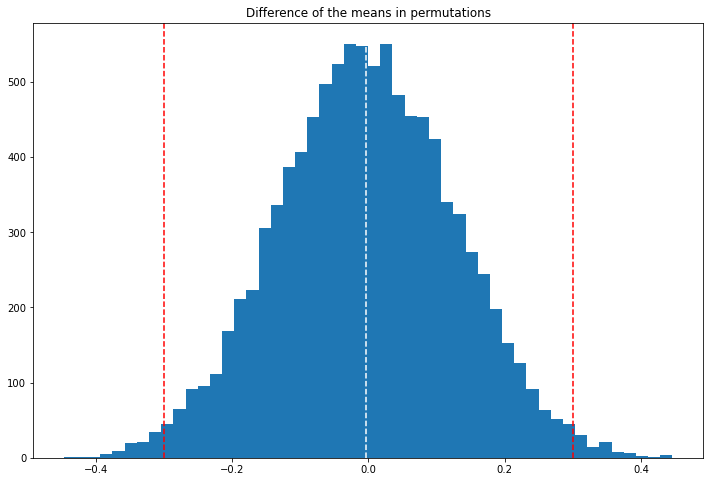

In [124]:
plt.figure(figsize=(12, 8))
plt.hist(mean_diff, bins=50);
plt.axvline(np.mean(mean_diff), linestyle='--', color='white');
plt.axvline(diff, linestyle='--', color='red');
plt.axvline(-diff, linestyle='--', color='red');
plt.title("Difference of the means in permutations");
plt.show();

##### **Welch's t-test Approach**

In [149]:
tstat, pval = stats.ttest_ind(sample3_a, sample3_b, equal_var=False, permutations=10000, random_state=30)
print(pval, 'is a significant value, therefore the null hypothesis is rejected')

0.0211 is a significant value, therefore the null hypothesis is rejected


In [150]:
tstat, pval = stats.ttest_ind(sample4_A.Time, sample4_B.Time, equal_var=False, permutations=10000, random_state=50)
print(pval, 'is not a significant value, therefore the null hypothesis is accepted')

0.2779 is not a significant value, therefore the null hypothesis is accepted


### **ANOVA Test** 

    Investigate an association between a quantitative variable and a non-binary categorical variable.
    
    Holds the same assumptions as 2-sample t-test.

In [152]:
sample5 = pd.read_csv('variants.txt', engine='python', sep=',')
sample5

,Sale,Store
0,73.57,A
1,38.37,A
2,49.36,A
3,61.96,A
4,38.74,A
...,...,...
445,65.98,C
446,50.51,C
447,46.77,C
448,70.39,C


In [153]:
sample5_A = sample5[sample5.Store == 'A']
sample5_B = sample5[sample5.Store == 'B']
sample5_C = sample5[sample5.Store == 'C']

In [154]:
np.std(sample5_A.Sale)/np.std(sample5_B.Sale)

1.0004942059663018

In [155]:
np.std(sample5_C.Sale)/np.std(sample5_B.Sale)

1.0234221979860356

In [157]:
np.std(sample5_C.Sale)/np.std(sample5_A.Sale)

1.0229166664664384

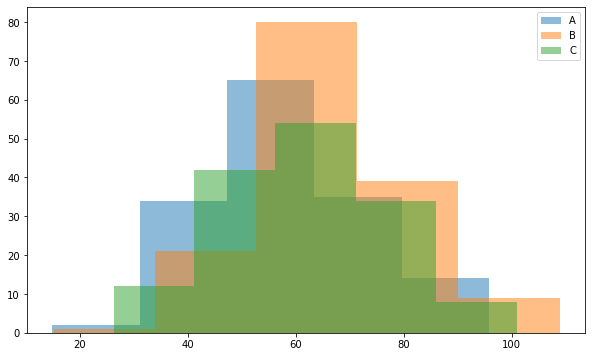

In [159]:
plt.figure(figsize=(10, 6))
plt.hist(sample5_A.Sale, bins=5, alpha=0.5, label='A')
plt.hist(sample5_B.Sale, bins=5, alpha=0.5, label='B')
plt.hist(sample5_C.Sale, bins=5, alpha=0.5, label='C')
plt.legend()
plt.show();

In [163]:
fstat, pval = stats.f_oneway(sample5_A.Sale, sample5_B.Sale, sample5_C.Sale)
print(pval, 'is significant. This pval shows that at least one of the group pairs behaves differently.')

0.00015355234908845413 is significant. This pval shows that at least one of the group pairs behaves differently.


### **Tukey's Range Test**

    Used to find the group pairs which are significantly different.
    
    Holds same assumption as the ANOVA test.

In [170]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(sample5.Sale, sample5.Store, 0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   7.2763 0.0001  3.2264 11.3263   True
     A      C    4.011 0.0529 -0.0389  8.0609  False
     B      C  -3.2653  0.141 -7.3153  0.7846  False
----------------------------------------------------


In [174]:
tukey_results = stats.tukey_hsd(sample5_A.Sale, sample5_B.Sale, sample5_C.Sale)
print(tukey_results)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -7.276     0.000   -11.326    -3.226
 (0 - 2)     -4.011     0.053    -8.061     0.039
 (1 - 0)      7.276     0.000     3.226    11.326
 (1 - 2)      3.265     0.141    -0.785     7.315
 (2 - 0)      4.011     0.053    -0.039     8.061
 (2 - 1)     -3.265     0.141    -7.315     0.785



    Based on the Tukey test, A & B are quite different and therefore, rejects the null hypothesis, while A & C, and B & C are similar and therefore accept the null hypothesis.

### **Chi-Square Test**

    Investigates whether there is an association between two categorical variables.
    
    Holds same assumptions as the 2-sample t-test.

**Ant Product Popularity**

    Determine the popularity of Ants product among graders.

##### **Import Data**

In [175]:
product = pd.read_csv('popular_product.txt', engine='python', sep=',')
product

,Grade,Ant
0,1st,harvester
1,2nd,harvester
2,2nd,leaf cutter
3,1st,harvester
4,3rd,leaf cutter
...,...,...
103,3rd,harvester
104,3rd,harvester
105,3rd,harvester
106,3rd,harvester


In [176]:
# prepare contingency table
contingency_table = pd.crosstab(product.Grade, product.Ant)
contingency_table

Ant,harvester,leaf cutter
Grade,,
1st,28,8
2nd,31,5
3rd,23,13


In [182]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table)
print(pval, 'is not significant. Therefore no ant product gives significant effect.')

0.08356116834982279 is not significant. Therefore no ant product gives significant effect.


**Montana Library Website Case Study**
       
       Determine if the effect of variation of a button tab influences the click rate.

##### **Import Data**

In [183]:
# Element list Homepage Version 1 - Interact, 5-29-2013.csv
url = 'https://drive.google.com/file/d/1Tj6Z4OtJqLBOW0z2fvuGS5EhZo8xTVM6/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
v1 = pd.read_csv(path)

# Element list Homepage Version 2 - Connect, 5-29-2013.csv
url = 'https://drive.google.com/file/d/1qHBdOjUWvJpN-LTg1z2jpeA3mDXQjdch/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
v2 = pd.read_csv(path)

# Element list Homepage Version 3 - Learn, 5-29-2013.csv
url = 'https://drive.google.com/file/d/1g8prRmy3hpVtL6zvkdCwXcgIV0CS48zr/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
v3 = pd.read_csv(path)

# Element list Homepage Version 4 - Help, 5-29-2013.csv
url = 'https://drive.google.com/file/d/1I9bjXkxtiILDogeQmsWCCDlQtRZ8OSrs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
v4 = pd.read_csv(path)

# Element list Homepage Version 5 - Services, 5-29-2013.csv
url = 'https://drive.google.com/file/d/1noDp_jpdAL_LGxU3SPDxqP94pUCqisqW/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
v5 = pd.read_csv(path)

In [188]:
# Obtain the number of clicks for each variation
v1_clicks = int(v1[v1.Name == 'INTERACT']['No. clicks'])
v2_clicks = int(v2[v2.Name == 'CONNECT']['No. clicks'])
v3_clicks = int(v3[v3.Name == 'LEARN']['No. clicks'])
v4_clicks = int(v4[v4.Name == 'HELP']['No. clicks'])
v5_clicks = int(v5[v5.Name == 'SERVICES']['No. clicks'])

print(v1_clicks, v2_clicks, v3_clicks, v4_clicks, v5_clicks)

42 53 21 38 45


In [190]:
# Number of page visits 
v1_visits = 10283
v2_visits = 2742
v3_visits = 2747
v4_visits = 3180
v5_visits = 2064

In [191]:
# click-through rates
interact_rate = float(v1_clicks / v1_visits)
connect_rate = float(v2_clicks / v2_visits)
learn_rate = float(v3_clicks / v3_visits)
help_rate = float(v4_clicks / v4_visits)
services_rate = float(v5_clicks / v5_visits)

In [211]:
# CTR from worst to best
rates = pd.Series([interact_rate, connect_rate, learn_rate, help_rate, services_rate])
names = pd.Series(["Interact", "Connect", "Learn", "Help", "Services"])

ctr_df = pd.DataFrame({"rates":rates, "names":names}).sort_values("rates")
ctr_df.sort_values("rates", ascending=False, inplace=True)

In [212]:
ctr_df

,rates,names
4,0.021802,Services
1,0.019329,Connect
3,0.011950,Help
2,0.007645,Learn
0,0.004084,Interact


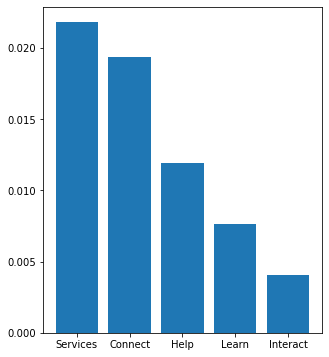

In [243]:
plt.figure(figsize=(5, 6))
plt.bar(ctr_df.names, ctr_df.rates);
plt.show();

In [193]:
# no-clicks
v1_noclick = v1_visits - v1_clicks
v2_noclick = v2_visits - v2_clicks
v3_noclick = v3_visits - v3_clicks
v4_noclick = v4_visits - v4_clicks
v5_noclick = v5_visits - v5_clicks

In [194]:
# contingency table as a pd.DataFrame creation
clicks = pd.Series([v1_clicks, v2_clicks, v3_clicks, v4_clicks, v5_clicks])
noclicks = pd.Series([v1_noclick, v2_noclick, v3_noclick, v4_noclick, v5_noclick])

contingency_table = pd.DataFrame(data = [clicks, noclicks])
contingency_table.columns = ["Interact", "Connect", "Learn", "Help", "Services"]
contingency_table.index = ["Click", "No-click"]

contingency_table

,Interact,Connect,Learn,Help,Services
Click,42,53,21,38,45
No-click,10241,2689,2726,3142,2019


In [208]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table)
print(pval, 'is a significant value')

4.852334301093838e-20 is a significant value


In [210]:
# Null Hypothesis expected click amount.
Expected_table = pd.DataFrame(expected)

Expected_table.rename(columns={0:'Interact', 1:'Connect', 2:'Learn', 3:'Help', 4:'Services'},\
                      index={0:'Click', 1:'No-Click'}, inplace=True)

Expected_table

,Interact,Connect,Learn,Help,Services
Click,97.36948,25.963932,26.011277,30.111344,19.543967
No-Click,10185.63052,2716.036068,2720.988723,3149.888656,2044.456033


**Pair-wise Comparison to determine Significant Pairs**

In [244]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Services', 'Connect']])
print(pval,', ' + 'Significance:', pval < 0.05)

0.6188771123975272 , Significance: False


    Services and Connect have no significance in terms of their impact. Following the click through rate, Services would be the best option.
    If these options are not used, we may use other options based on the pair-wise comparisons below.

In [246]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Interact', 'Connect']])
print(pval,', ' + 'Significance:', pval < 0.05)

2.2250331654688293e-16 , Significance: True


In [247]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Interact', 'Learn']])
print(pval,', ' + 'Significance:', pval < 0.05)

0.025419824342152637 , Significance: True


In [248]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Interact', 'Help']])
print(pval,', ' + 'Significance:', pval < 0.05)

9.03599988558687e-07 , Significance: True


In [249]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Interact', 'Services']])
print(pval,', ' + 'Significance:', pval < 0.05)

5.719451224375125e-18 , Significance: True


In [250]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Learn', 'Connect']])
print(pval,', ' + 'Significance:', pval < 0.05)

0.00027678881264505827 , Significance: True


In [251]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Help', 'Connect']])
print(pval,', ' + 'Significance:', pval < 0.05)

0.02808815288948292 , Significance: True


In [252]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Learn', 'Help']])
print(pval,', ' + 'Significance:', pval < 0.05)

0.12512753088691322 , Significance: False


In [253]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Learn', 'Services']])
print(pval,', ' + 'Significance:', pval < 0.05)

5.0540996583731365e-05 , Significance: True


In [254]:
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table[['Help', 'Services']])
print(pval,', ' + 'Significance:', pval < 0.05)

0.007370912499282061 , Significance: True


## **Miscelleneous Exercise**

    Analysis of heart disease data using different techniques.

In [303]:
heart = pd.read_csv('heart_disease.txt', engine='python', sep=',')
heart

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence
...,...,...,...,...,...,...,...,...,...
298,45.0,male,110.0,264.0,typical angina,0.0,0.0,132.0,presence
299,68.0,male,144.0,193.0,asymptomatic,0.0,1.0,141.0,presence
300,57.0,male,130.0,131.0,asymptomatic,1.0,0.0,115.0,presence
301,57.0,female,130.0,236.0,atypical angina,0.0,0.0,174.0,presence


    age: age in years
    
    sex: sex assigned at birth; 'male' or 'female'
    
    trestbps: resting blood pressure in mm Hg
    
    chol: serum cholesterol in mg/dl
    
    cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
    
    exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
    
    fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
    
    thalach: maximum heart rate achieved in exercise test
    
    heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

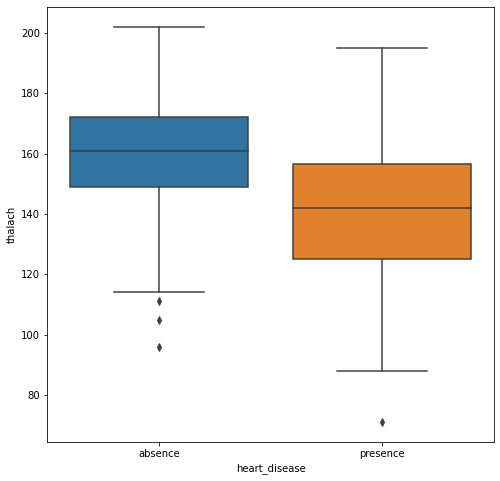

In [314]:
# Is thalach, age, trestbps, chol associated with whether or not a patient will ultimately be diagnosed with heart disease?
plt.figure(figsize=(8, 8));
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show();

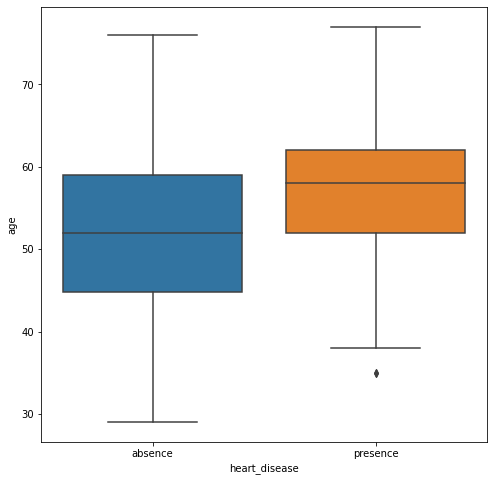

In [315]:
plt.figure(figsize=(8, 8));
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show();

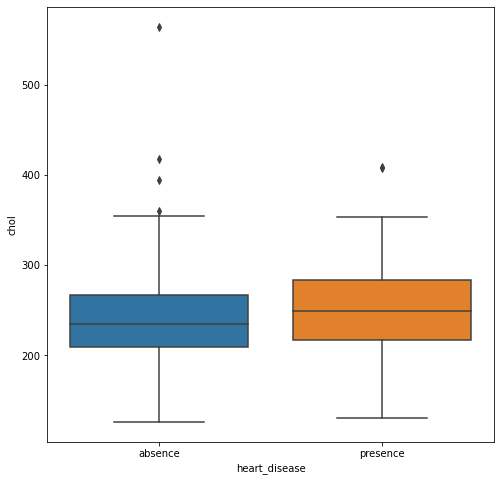

In [316]:
plt.figure(figsize=(8, 8));
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.show();

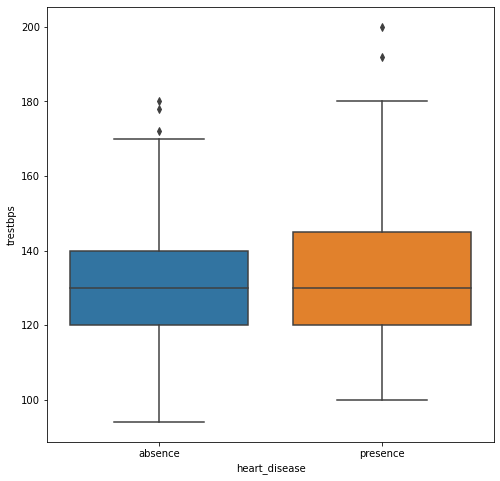

In [317]:
plt.figure(figsize=(8, 8));
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show();

In [310]:
thalach_hd = heart[heart.heart_disease == 'presence'].thalach
thalach_no_hd = heart[heart.heart_disease == 'absence'].thalach

age_hd = heart[heart.heart_disease == 'presence'].age
age_no_hd = heart[heart.heart_disease == 'absence'].age

trestbps_hd = heart[heart.heart_disease == 'presence'].trestbps
trestbps_no_hd = heart[heart.heart_disease == 'absence'].trestbps

chol_hd = heart[heart.heart_disease == 'presence'].chol
chol_no_hd = heart[heart.heart_disease == 'absence'].chol

In [309]:
print(thalach_no_hd.mean() - thalach_hd.mean())
print('-------------------------------------------')
print(thalach_no_hd.median() - thalach_hd.median())

19.11905597473242
-------------------------------------------
19.0


In [311]:
print(age_no_hd.mean() - age_hd.mean())
print('-------------------------------------------')
print(age_no_hd.median() - age_hd.median())

-4.040533426917001
-------------------------------------------
-6.0


In [312]:
print(trestbps_no_hd.mean() - trestbps_hd.mean())
print('-------------------------------------------')
print(trestbps_no_hd.median() - trestbps_hd.median())

-5.318345323740999
-------------------------------------------
0.0


In [313]:
print(chol_no_hd.mean() - chol_hd.mean())
print('-------------------------------------------')
print(chol_no_hd.median() - chol_hd.median())

-8.834576241445887
-------------------------------------------
-14.5


#### **1-Sample t-test**

In [322]:
# Is the average thalach, age, chol, trestbps for heart disease patient significantly different from the average thalach 
# for a person without heart disease?

tstat1, pval1 = stats.ttest_1samp(list(thalach_hd), np.mean(thalach_no_hd))
tstat2, pval2 = stats.ttest_1samp(list(age_hd), np.mean(age_no_hd))
tstat3, pval3 = stats.ttest_1samp(list(chol_hd), np.mean(chol_no_hd))
tstat4, pval4 = stats.ttest_1samp(list(trestbps_hd), np.mean(trestbps_no_hd))


print(pval1,', ' + 'Significance:', pval1 < 0.05)
print('-------------------------------------------')
print(pval2,', ' + 'Significance:', pval2 < 0.05)
print('-------------------------------------------')
print(pval3,', ' + 'Significance:', pval3 < 0.05)
print('-------------------------------------------')
print(pval4,', ' + 'Significance:', pval4 < 0.05)

5.519497642701956e-18 , Significance: True
-------------------------------------------
1.6373040826729806e-08 , Significance: True
-------------------------------------------
0.037124649795421356 , Significance: True
-------------------------------------------
0.0010750589938665872 , Significance: True


#### **2-Sample t-test**

In [323]:
tstat1, pval1 = stats.ttest_ind(list(thalach_hd), list(thalach_no_hd))
tstat2, pval2 = stats.ttest_ind(list(age_hd), list(age_no_hd))
tstat3, pval3 = stats.ttest_ind(list(chol_hd), list(chol_no_hd))
tstat4, pval4 = stats.ttest_ind(list(trestbps_hd), list(trestbps_no_hd))


print(pval1,', ' + 'Significance:', pval1 < 0.05)
print('-------------------------------------------')
print(pval2,', ' + 'Significance:', pval2 < 0.05)
print('-------------------------------------------')
print(pval3,', ' + 'Significance:', pval3 < 0.05)
print('-------------------------------------------')
print(pval4,', ' + 'Significance:', pval4 < 0.05)

3.456964908430172e-14 , Significance: True
-------------------------------------------
8.955636917529706e-05 , Significance: True
-------------------------------------------
0.13914167020436527 , Significance: False
-------------------------------------------
0.008548268928594928 , Significance: True


#### **ANOVA test**

In [324]:
# Investigate the relationship between thalach, age, chol, trestbps and the 
# type of heart pain a person experiences.

thalach_typical =  heart[heart.cp == 'typical angina'].thalach
thalach_asymptom = heart[heart.cp == 'asymptomatic'].thalach
thalach_nonangin =  heart[heart.cp == 'non-anginal pain'].thalach
thalach_atypical =  heart[heart.cp == 'atypical angina'].thalach


age_typical =  heart[heart.cp == 'typical angina'].age
age_asymptom = heart[heart.cp == 'asymptomatic'].age
age_nonangin =  heart[heart.cp == 'non-anginal pain'].age
age_atypical =  heart[heart.cp == 'atypical angina'].age


chol_typical =  heart[heart.cp == 'typical angina'].chol
chol_asymptom = heart[heart.cp == 'asymptomatic'].chol
chol_nonangin =  heart[heart.cp == 'non-anginal pain'].chol
chol_atypical =  heart[heart.cp == 'atypical angina'].chol


trestbps_typical =  heart[heart.cp == 'typical angina'].trestbps
trestbps_asymptom = heart[heart.cp == 'asymptomatic'].trestbps
trestbps_nonangin =  heart[heart.cp == 'non-anginal pain'].trestbps
trestbps_atypical =  heart[heart.cp == 'atypical angina'].trestbps

In [325]:
fstat1, pval1 = stats.f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
fstat2, pval2 = stats.f_oneway(age_typical, age_asymptom, age_nonangin, age_atypical)
fstat3, pval3 = stats.f_oneway(chol_typical, chol_asymptom, chol_nonangin, chol_atypical)
fstat4, pval4 = stats.f_oneway(trestbps_typical, trestbps_asymptom, trestbps_nonangin, trestbps_atypical)

print(pval1,', ' + 'Significance:', pval1 < 0.05)
print('-------------------------------------------')
print(pval2,', ' + 'Significance:', pval2 < 0.05)
print('-------------------------------------------')
print(pval3,', ' + 'Significance:', pval3 < 0.05)
print('-------------------------------------------')
print(pval4,', ' + 'Significance:', pval4 < 0.05)

1.9065505247705008e-10 , Significance: True
-------------------------------------------
0.01907804944707371 , Significance: True
-------------------------------------------
0.6006915022059879 , Significance: False
-------------------------------------------
0.03320471625132099 , Significance: True


#### **Tukey's test**

In [328]:
tukey_results1 = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
tukey_results2 = pairwise_tukeyhsd(heart.age, heart.cp, 0.05)
tukey_results3 = pairwise_tukeyhsd(heart.trestbps, heart.cp, 0.05)


print(tukey_results1)
print('\n')
print(tukey_results2)
print('\n')
print(tukey_results3)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
    asymptomatic  atypical angina  -4.3

#### **Chi-Square test**

In [329]:
contingency_table1 = pd.crosstab(heart.cp, heart.heart_disease)
contingency_table2 = pd.crosstab(heart.sex, heart.heart_disease)
contingency_table3 = pd.crosstab(heart.cp, heart.sex)

print(contingency_table1)
print('\n')
print(contingency_table2)
print('\n')
print(contingency_table3)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


heart_disease  absence  presence
sex                             
female              72        25
male                92       114


sex               female  male
cp                            
asymptomatic          40   104
atypical angina       18    32
non-anginal pain      35    51
typical angina         4    19


In [331]:
chi1, pval1, dof, expected = stats.chi2_contingency(contingency_table1)
chi2, pval2, dof, expected = stats.chi2_contingency(contingency_table2)
chi3, pval3, dof, expected = stats.chi2_contingency(contingency_table3)

print(pval1,', ' + 'Significance:', pval1 < 0.05)
print('-------------------------------------------')
print(pval2,', ' + 'Significance:', pval2 < 0.05)
print('-------------------------------------------')
print(pval3,', ' + 'Significance:', pval3 < 0.05)

1.2517106007837527e-17 , Significance: True
-------------------------------------------
2.666712348180942e-06 , Significance: True
-------------------------------------------
0.07885024424877551 , Significance: False
